# Optimization for Business Application

Optimization techniques are widely used in various business applications to improve efficiency, reduce costs, maximize profits, and make better decisions. Some common business applications of optimization techniques include:

1. <span style='color:blue'>Supply Chain Management:</span> Optimizing inventory levels, production schedules, and distribution networks to minimize costs and improve customer service.

2. <span style='color:blue'>Resource Allocation:</span> Optimizing the allocation of resources such as manpower, machinery, and materials to maximize productivity and minimize waste.

3. <span style='color:blue'>Transportation and Logistics:</span> Optimizing vehicle routes and schedules to minimize fuel consumption, reduce transportation costs, and improve delivery times.

4. <span style='color:blue'>Financial Planning:</span> Optimizing investment portfolios, risk management strategies, and financial models to maximize returns and minimize risks.

5. <span style='color:blue'>Marketing and Pricing:</span> Optimizing marketing campaigns, pricing strategies, and product placements to maximize revenue and market share.

6. <span style='color:blue'>Production Planning:</span> Optimizing production processes, scheduling, and capacity utilization to meet demand while minimizing costs.

7. <span style='color:blue'>Scheduling and Timetabling:</span> Optimizing employee schedules, project timelines, and event schedules to improve efficiency and reduce conflicts.

### General Form

\begin{align}
    \mbox{Min} ~ &F(x_1, x_2, ..., x_n) \\
    \mbox{s.t. } &g(x_1, x_2, ..., x_n) \geq 0 \\
    &x_1, x_2, ..., x_n \geq 0,\\
    &x_1, x_2, ..., x_n \in R
\end{align}

<span style='color:blue'>F:</span> is the objective function. <br>
<span style='color:blue'>g:</span> is the constraint function. <br>
<span style='color:blue'>$x_1, x_2, ..., x_n$:</span> are the variables. <br>


# Operation Management: Resource Allocation
A company manufactures two products, Product A and Product B. Each product requires two types of raw materials, Material X and Material Y. The company has 500 units of Material X and 800 units of Material Y available. Product A requires 3 units of Material X and 4 units of Material Y, while Product B requires 5 units of Material X and 2 units of Material Y. The company wants to maximize its profit from selling these products, where the profit from Product A is \\$10 per unit and the profit from Product B is $8 per unit. How many units of each product should the company produce to maximize its profit, given the constraints on available raw materials?

### Identify the Decision Variables
Let $x$ be the number of units of Product A to produce, and let $y$ be the number of units of Product B to produce.

### Formulate the Objective Function
$Maximize ~ Z = 10x+8y$


### The Constraints
Material X Constraint: This constraint ensures that the total units of Material X used in producing both Product A and Product B do not exceed the available 500 units.<br>
$ 3x + 5y \leq 500$

Material Y Constraint: Similarly, this constraint ensures that the total units of Material Y used in producing both Product A and Product B do not exceed the available 800 units.<br> 
$ 4x + 2y \leq 800$

None Negative Constraint:<br>
$ x, y \geq 0$ <br>

### Problem Visualization

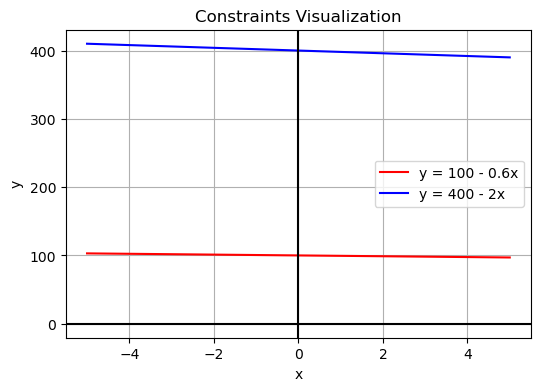

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy.optimize import linprog

# Define the equations (y = mx + b)
def equation1(x):
    return 100 - 3/5 * x
def equation2(x):
    return 400- 2 * x

# Generate x values
x = np.linspace(-5, 5, 100)
frames = np.linspace(1, 4000, 100)

# Plot the equations
plt.figure(figsize=(6, 4))
plt.plot(x, equation1(x), color = 'r', label = 'y = 100 - 0.6x')
plt.plot(x, equation2(x), color = 'b', label = 'y = 400 - 2x')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Constraints')
plt.legend()

# Show plot
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

### Optimal Solution Search Procedure Visualization：

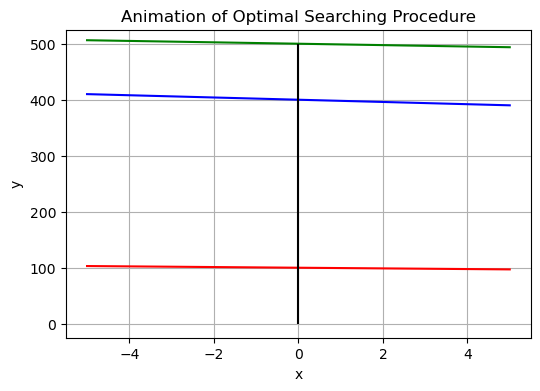

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.rcParams['animation.ffmpeg_path'] = 'C:/Users/yjyzx/ffmpeg/bin/ffmpeg.exe'

# Define the equations
def equation1(x):
    return 100 - 0.6 * x

def equation2(x):
    return 400 - 2 * x

def equation3(x, b):
    return (b - 10 * x) / 8

# Generate x values
x = np.linspace(-5, 5, 100)
frames = np.linspace(1, 4000, 100)

# Initialize figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
line, = ax.plot(x, equation3(x, frames), color = 'g')

# Add labels and legend
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Animation of Optimal Searching Procedure')

static_equation1 = equation1(x)
ax.plot(x, static_equation1, color = 'r', linestyle = '-')

static_equation2 = equation2(x)
ax.plot(x, static_equation2, color = 'b', linestyle = '-')

ax.vlines(x = 0, ymin = 0, ymax = 500, color = 'black')

# Animation update function
def update(frame):
    line.set_ydata(equation3(x, frame))
    return line,

# Create animation
anim = FuncAnimation(fig, update, frames, interval = 50, blit = True)

# Show plot
plt.grid(True)
HTML(anim.to_html5_video())

### Solving

In [41]:
from pulp import *

# Create a LP minimization problem
prob = LpProblem("Maximize Profit", LpMaximize)

# Define decision variables
A = LpVariable("Product_A", lowBound=0, cat='Continuous')
B = LpVariable("Product_B", lowBound=0, cat='Continuous')

# Define objective function
prob += 10 * A + 8 * B, "Total Profit"

# Define constraints
prob += 3 * A + 5 * B <= 500, "Material_X_Constraint"
prob += 4 * A + 2 * B <= 800, "Material_Y_Constraint"

# Solve the problem
prob.solve()

# Print the results
print("Optimal Production Quantity:")
print("Product A:", value(A))
print("Product B:", value(B))
print("Total Profit: $", value(prob.objective))

Optimal Production Quantity:
Product A: 166.66667
Product B: 0.0
Total Profit: $ 1666.6667000000002


### What decision can you make?

##### Answer: 

# Gradient descent (GD)

An iterative first-order optimisation algorithm, used to find a local minimum/maximum of a given function. Gradient descent is completely deterministic and well connected to the underlying problem, with well-understood convergence properties. This method is commonly used in machine learning (ML) and deep learning (DL) to minimise a cost/loss function (e.g. in a linear regression). Due to its importance and ease of implementation, this algorithm is usually taught at the beginning of almost all machine learning courses.

Gradient descent algorithm does not work for all functions. There are two specific mathematical requirements. A function has to be:
1. Differentiability: The function to be optimized must be differentiable. This allows us to calculate the gradient of the function, which is used to determine the direction of steepest descent.

2. Continuous Function: The function should be continuous to ensure that small changes in the input result in small changes in the output. This property is important for the convergence of the algorithm.

3. Convexity (for standard gradient descent): While gradient descent can be applied to nonconvex functions, it may converge to local minima or saddle points. For standard gradient descent to guarantee convergence to the global minimum, the function should be convex.

### Convex VS Non-Convex

<div style="text-align: center;">
    <img src="ConvexSet.jpg" alt="Alt Text" width="50%">
</div>

<span style='color:blue'>Convex function:</span> A function is convex if the line segment between any two points on the graph of the function lies in the feasiable region.<br>
<span style='color:blue'>Convex optimization:</span> The objective function and the feasible set are both convex. Convex problems have a single global optimal, which makes them relatively easier to solve compared to nonconvex problems.

<span style='color:blue'>NonConvex function:</span> A function is NonConvex if the line segment between any two points on the graph of the function lies outside of the feasiable region.<br>
<span style='color:blue'>NonConvex optimization:</span> In nonconvex optimization, either the objective function or the feasible set (or both) are nonconvex. Nonconvex functions have properties such as local optimal, which can make finding the global optimal challenging.

When minimizing a function using gradient descent, you should look for the negative gradient value. This is because the gradient points in the direction of the steepest ascent, i.e., the direction in which the function increases the fastest. Therefore, moving in the opposite direction of the gradient (i.e., in the direction of the negative gradient) will lead you towards the minimum of the function. In other words, in the gradient descent algorithm, you update the current point by subtracting a multiple of the gradient from it. This multiple is known as the learning rate and determines the size of the step you take in the direction of the negative gradient. By doing this iteratively, you can eventually converge to a local minimum of the function.

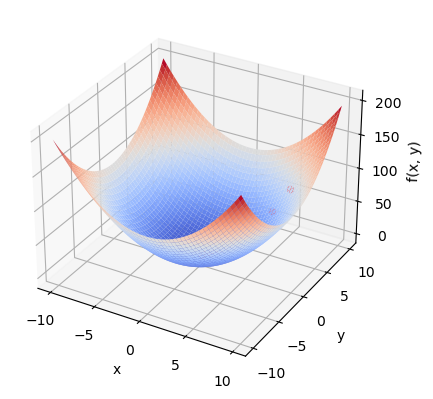

(0.09223372036854777,
 0.09223372036854777,
 0.017014118346046925,
 [(6.4, 6.4, 81.92000000000002),
  (5.12, 5.12, 52.4288),
  (4.096, 4.096, 33.554432),
  (3.2768, 3.2768, 21.47483648),
  (2.62144, 2.62144, 13.743895347200002),
  (2.0971520000000003, 2.0971520000000003, 8.796093022208003),
  (1.6777216000000004, 1.6777216000000004, 5.629499534213123),
  (1.3421772800000003, 1.3421772800000003, 3.602879701896398),
  (1.0737418240000003, 1.0737418240000003, 2.305843009213695),
  (0.8589934592000003, 0.8589934592000003, 1.475739525896765),
  (0.6871947673600002, 0.6871947673600002, 0.9444732965739295),
  (0.5497558138880001, 0.5497558138880001, 0.6044629098073148),
  (0.43980465111040007, 0.43980465111040007, 0.38685626227668146),
  (0.35184372088832006, 0.35184372088832006, 0.24758800785707613),
  (0.281474976710656, 0.281474976710656, 0.1584563250285287),
  (0.22517998136852482, 0.22517998136852482, 0.10141204801825837),
  (0.18014398509481985, 0.18014398509481985, 0.06490371073168535)

In [27]:
# A simple function

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be minimized (a simple quadratic function)
def f(x, y):
    return x**2 + y**2

# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return 2 * x

def df_dy(x, y):
    return 2 * y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.scatter(*zip(*history), c='r', marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()

# Define the gradient descent algorithm
def gradient_descent(start_x, start_y, learning_rate, num_iterations):
    # Initialize the parameters
    x = start_x
    y = start_y
    history = []
    
    # Perform the gradient descent iterations
    for i in range(num_iterations):
        # Calculate the gradients
        grad_x = df_dx(x, y)
        grad_y = df_dy(x, y)
        
        # Update the parameters
        x = x - learning_rate * grad_x
        y = y - learning_rate * grad_y
        
        # Save the history of the parameters
        history.append((x, y, f(x, y)))
    
    return x, y, f(x, y), history

# Define the meshgrid for plotting the function
x_range = np.arange(-10, 10, 0.1)
y_range = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

# Perform gradient descent and plot the results
start_x, start_y = 8, 8
learning_rate = 0.1
num_iterations = 20
x_opt, y_opt, f_opt, history = gradient_descent(start_x, start_y, learning_rate, num_iterations)
x_opt, y_opt, f_opt, history

### A more complicated Eggholder function. 
Eggholder function global optimal is -959.6407 with the point of (512, 404.2319)<br>
Below is a visualization of EggHolder Function. 

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from numpy import*
def f(x1,x2):
    a=sqrt(fabs(x2+x1/2+47))
    b=sqrt(fabs(x1-(x2+47)))
    c=-(x2+47)*sin(a)-x1*sin(b)
    return c
x1=linspace(-512,512,100)
x2=linspace(-512,512,100)
X1,X2=meshgrid(x1,x2)

def plotter(E,A):
    fig=plt.figure(figsize=[12,8])
    ax=plt.axes(projection='3d')
    ax.plot_surface(X1,X2,f(X1,X2),color='red',alpha=0.7)
    ax.plot_wireframe(X1,X2,f(X1,X2),ccount=2,rcount=2, color='orange',alpha=0.8)   
    ax.view_init(elev=E,azim=A)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1,x2)')
    plt.show()

from ipywidgets import interactive
iplot=interactive(plotter,E=(-90,90,5),A=(-90,90,5))
iplot

interactive(children=(IntSlider(value=0, description='E', max=90, min=-90, step=5), IntSlider(value=0, descrip…

In [26]:
import numpy as np

# Define the Egg Holder function
def egg_holder(x1, x2):
    a=sqrt(fabs(x2+x1/2+47))
    b=sqrt(fabs(x1-(x2+47)))
    c=-(x2+47)*sin(a)-x1*sin(b)
    return c
    
# Define the gradient of the Egg Holder function
def egg_holder_gradient(x, y):
    epsilon = 1e-8  # Small epsilon value to avoid division by zero
    dx = -0.5 * np.sin(np.sqrt(np.abs(x/2 + (y+47)))) * (1 / np.sqrt(np.abs(x/2 + (y+47)))) * (1/2) + (x / np.abs(x)) * np.cos(np.sqrt(np.abs(x - (y+47)))) * (1 / np.sqrt(np.abs(x - (y+47)))) - np.cos(np.sqrt(np.abs(x - (y+47))))
    dy = -np.sin(np.sqrt(np.abs(x/2 + (y+47)))) * (1 / np.sqrt(np.abs(x/2 + (y+47)))) * (1/2) + (1 / np.abs(x)) * np.cos(np.sqrt(np.abs(x - (y+47)))) * (1 / np.sqrt(np.abs(x - (y+47)))) - np.cos(np.sqrt(np.abs(x - (y+47))))
    return np.array([dx, dy])

# Gradient Descent
def gradient_descent(gradient_func, initial_point, learning_rate=0.001, max_iterations = 1000):
    point = initial_point
    for i in range(max_iterations):
        grad = gradient_func(*point)
        next_point = point - learning_rate * grad
        point = next_point
        print("current value:", egg_holder(*point))
    return point

# Initial point
initial_point = np.array([100, 100])

# Apply gradient descent
result = gradient_descent(egg_holder_gradient, initial_point)

print("Optimal point:", result)
print("Optimal value:", egg_holder(*result))

current value: -200.41717382565656
current value: -200.4199542938084
current value: -200.42273446920296
current value: -200.42551435184123
current value: -200.42829394172372
current value: -200.43107323885135
current value: -200.433852243225
current value: -200.43663095484473
current value: -200.439409373712
current value: -200.44218749982699
current value: -200.4449653331909
current value: -200.4477428738042
current value: -200.4505201216673
current value: -200.4532970767815
current value: -200.45607373914743
current value: -200.45885010876555
current value: -200.46162618563685
current value: -200.46440196976192
current value: -200.46717746114132
current value: -200.46995265977603
current value: -200.47272756566682
current value: -200.47550217881428
current value: -200.4782764992191
current value: -200.48105052688226
current value: -200.48382426180441
current value: -200.48659770398615
current value: -200.4893708534283
current value: -200.49214371013173
current value: -200.49491627409

##### Are we optimal?

##### Is there any way we can get close to optimal?